# **Support Vector Regression**

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mounting a drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing the dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthInsuranceData.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Separating the features/inputs and targets/outputs

In [ ]:
X = dataset.iloc[:, 2: 3].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[27.9 ]
 [33.77]
 [33.  ]
 ...
 [36.85]
 [25.8 ]
 [29.07]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# Splitting the dataset into Training set and Test set. Using test data to visulaise the results in better way because the dataset I took does have hundreds of rows of data so, I'm just taking 3 percent of the data by using below method

In [ ]:
required_test_size = 0.03
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = required_test_size, random_state = 0)

Update X and y Values

In [ ]:
X = X_test
y = y_test

**Reshape y - we are dealing with 1D array** - Note:- For the first time I run the regressor code it showed the correct result.. rest of the time it showing dimension errors. So  I had to rearrange.

In [ ]:
y = y.reshape(len(y),1)
print(len(X))
print(len(y))

41
41


Feature scaling - it is mandatory in SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-0.45332   ]
 [ 0.5096211 ]
 [ 0.38330685]
 ...
 [ 1.0148781 ]
 [-0.79781341]
 [-0.26138796]]


In [ ]:
print(y)

[[-0.30823981]
 [-0.40028902]
 [ 2.50582433]
 [-0.05594652]
 [-0.31451891]
 [-0.71686217]
 [-0.8969302 ]
 [-0.17431543]
 [-0.47932979]
 [-0.64453583]
 [-0.54066204]
 [-0.24805815]
 [-0.49492758]
 [-0.74151952]
 [ 0.36335095]
 [-0.23173445]
 [-0.0893036 ]
 [-0.79584528]
 [-0.56375138]
 [ 1.54952295]
 [ 0.80579842]
 [-0.07993527]
 [ 0.73369635]
 [ 0.73524932]
 [-0.93788149]
 [-0.70377888]
 [-0.77691074]
 [-0.46794869]
 [-0.7750338 ]
 [-0.410788  ]
 [-0.43846004]
 [ 2.76145626]
 [-0.05365579]
 [ 0.54477934]
 [ 0.07090791]
 [-0.74524072]
 [-0.41597371]
 [ 2.93543601]
 [ 2.06008789]
 [-0.92178008]
 [-0.64195285]]


Tranining the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[22.2]])).reshape(-1,1))

array([[7179.94698846]])

Visualising the SVR results

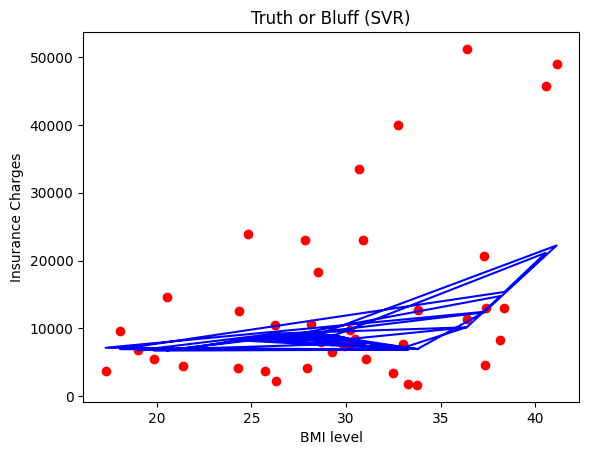

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('BMI level')
plt.ylabel('Insurance Charges')
plt.show()